In [1]:
#pip install tf_keras #To avoid keras layers issue during transfer learning

In [2]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt

2024-04-11 15:13:31.009918: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 15:13:31.010019: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 15:13:31.114997: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
print(tf.__version__)

2.15.0


In [4]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/kaggle/input/sentiment-images-classifier/6 Emotions for image classification"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 6 directories and 0 images in '/kaggle/input/sentiment-images-classifier/6 Emotions for image classification'
There are 0 directories and 163 images in '/kaggle/input/sentiment-images-classifier/6 Emotions for image classification/fear'
There are 0 directories and 224 images in '/kaggle/input/sentiment-images-classifier/6 Emotions for image classification/sad'
There are 0 directories and 168 images in '/kaggle/input/sentiment-images-classifier/6 Emotions for image classification/pain'
There are 0 directories and 201 images in '/kaggle/input/sentiment-images-classifier/6 Emotions for image classification/disgust'
There are 0 directories and 230 images in '/kaggle/input/sentiment-images-classifier/6 Emotions for image classification/happy'
There are 0 directories and 214 images in '/kaggle/input/sentiment-images-classifier/6 Emotions for image classification/anger'


In [5]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/kaggle/input/sentiment-images-classifier/6 Emotions for image classification") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['anger' 'disgust' 'fear' 'happy' 'pain' 'sad']


In [6]:
# View an image
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.figure()
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image
  return img

Image shape: (408, 612, 3)
Image shape: (924, 1500, 3)
Image shape: (779, 1531, 3)
Image shape: (234, 327, 3)
Image shape: (408, 612, 3)
Image shape: (408, 612, 3)


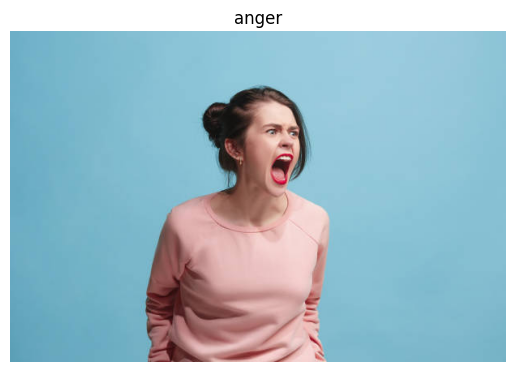

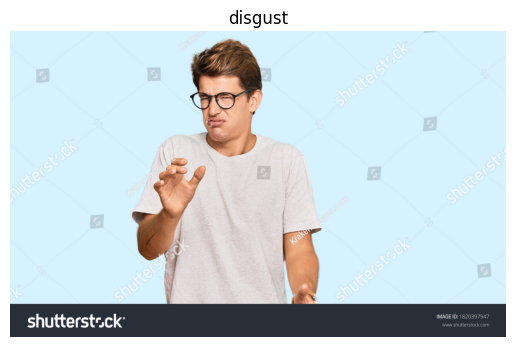

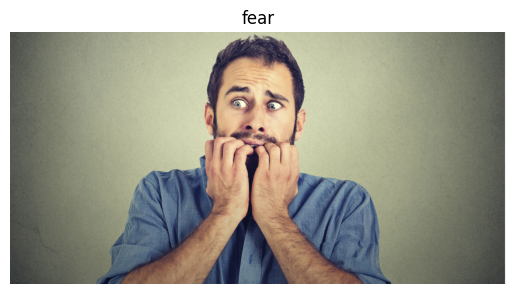

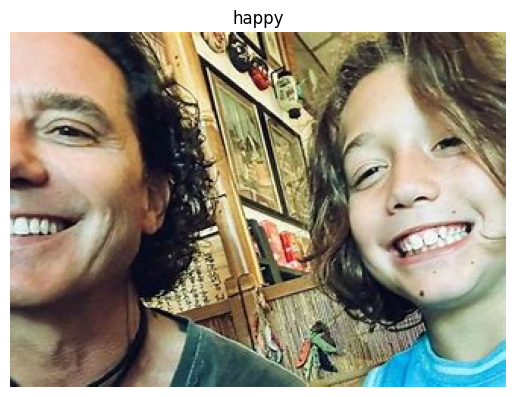

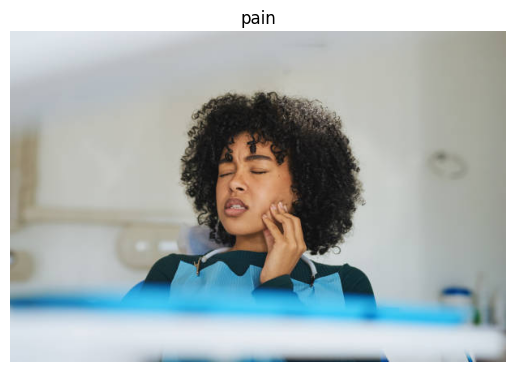

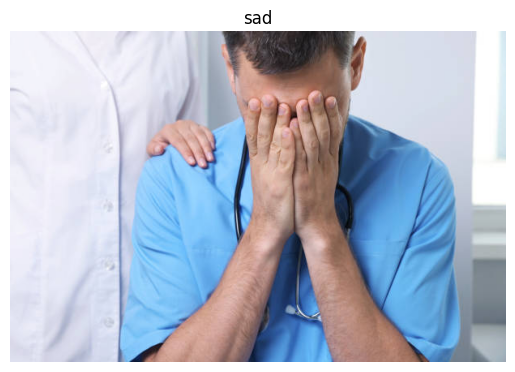

In [7]:
#View a random image from the training dataset
for item in class_names:
    img = view_random_image(target_dir="/kaggle/input/sentiment-images-classifier/6 Emotions for image classification/",target_class=item)

In [8]:
import shutil
from random import shuffle
from math import ceil

def split_data_and_copy(source_dir,target_dir,percent_of_train_data):
    os.makedirs(target_dir, exist_ok=True)
        
    train_dir = os.path.join(target_dir,'train')
    test_dir = os.path.join(target_dir,'test')

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    for subdir, dirs, files in os.walk(source_dir):
        if subdir == source_dir:
            continue
        subdir_name = os.path.basename(subdir)
        train_subdir = os.path.join(train_dir,subdir_name)
        test_subdir = os.path.join(test_dir,subdir_name)

        print(f"- Working on {train_subdir} and {test_subdir}")
        os.makedirs(train_subdir, exist_ok=True)
        os.makedirs(test_subdir, exist_ok=True)

        shuffle(files)
        split_point = ceil(percent_of_train_data * len(files) / 100)

        train_files = files[:split_point]
        test_files = files[split_point:]

        for file in train_files:
            shutil.copy(os.path.join(subdir,file),train_subdir)

        for file in test_files:
            shutil.copy(os.path.join(subdir,file),test_subdir)
            

    print("Images copied successfully.")

In [9]:
split_data_and_copy("/kaggle/input/sentiment-images-classifier/6 Emotions for image classification","/kaggle/working/",80)

- Working on /kaggle/working/train/fear and /kaggle/working/test/fear
- Working on /kaggle/working/train/sad and /kaggle/working/test/sad
- Working on /kaggle/working/train/pain and /kaggle/working/test/pain
- Working on /kaggle/working/train/disgust and /kaggle/working/test/disgust
- Working on /kaggle/working/train/happy and /kaggle/working/test/happy
- Working on /kaggle/working/train/anger and /kaggle/working/test/anger
Images copied successfully.


In [ ]:
#To remove all directories and images, in case for clean up purposes
# shutil.rmtree("/kaggle/working/test")
# shutil.rmtree("/kaggle/working/train")



In [10]:
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/kaggle/working/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 3 directories and 0 images in '/kaggle/working/'
There are 0 directories and 0 images in '/kaggle/working/.virtual_documents'
There are 6 directories and 0 images in '/kaggle/working/train'
There are 0 directories and 172 images in '/kaggle/working/train/anger'
There are 0 directories and 161 images in '/kaggle/working/train/disgust'
There are 0 directories and 131 images in '/kaggle/working/train/fear'
There are 0 directories and 180 images in '/kaggle/working/train/sad'
There are 0 directories and 135 images in '/kaggle/working/train/pain'
There are 0 directories and 184 images in '/kaggle/working/train/happy'
There are 6 directories and 0 images in '/kaggle/working/test'
There are 0 directories and 42 images in '/kaggle/working/test/anger'
There are 0 directories and 40 images in '/kaggle/working/test/disgust'
There are 0 directories and 32 images in '/kaggle/working/test/fear'
There are 0 directories and 44 images in '/kaggle/working/test/sad'
There are 0 directories and 

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=30, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the 
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "/kaggle/working/train"
test_dir = "/kaggle/working/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42,
                                               shuffle=True)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42,
                                               shuffle=True)

Found 921 images belonging to 6 classes.
Found 227 images belonging to 6 classes.


In [12]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(6, activation="softmax") # output
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


# Code Snippet for EarlyStopping
ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1,restore_best_weights='True')
LR = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10 ** (epoch/2), verbose=1)
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks=[ES,LR])


Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/10


I0000 00:00:1712848497.663512     124 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


29/29 [==============================] - 22s 577ms/step - loss: 1.7879 - accuracy: 0.1911 - val_loss: 1.7836 - val_accuracy: 0.2026 - lr: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 3.1622776601683795e-05.
Epoch 2/10
29/29 [==============================] - 16s 568ms/step - loss: 1.7784 - accuracy: 0.1846 - val_loss: 1.7760 - val_accuracy: 0.1894 - lr: 3.1623e-05

Epoch 3: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3/10
29/29 [==============================] - 16s 555ms/step - loss: 1.7746 - accuracy: 0.2009 - val_loss: 1.7710 - val_accuracy: 0.1850 - lr: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.00031622776601683794.
Epoch 4/10
29/29 [==============================] - 16s 560ms/step - loss: 1.7794 - accuracy: 0.2313 - val_loss: 1.7486 - val_accuracy: 0.2247 - lr: 3.1623e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/10
29/29 [==============================] - 17s 574ms/step - loss: 1.757

In [13]:
model_1.fit(valid_data)

8/8 [==============================] - 2s 270ms/step - loss: 615146.9375 - accuracy: 0.1498


<Axes: >

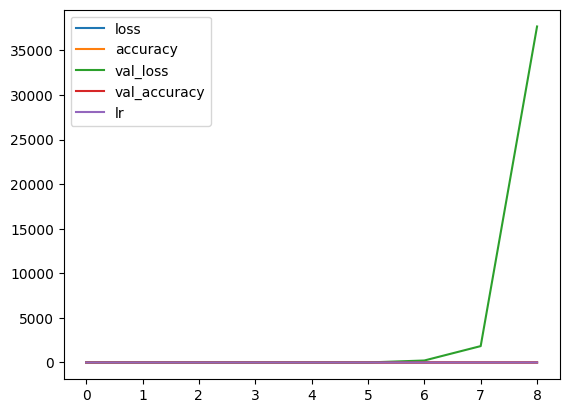

In [15]:
pd.DataFrame(history_1.history).plot()

# Transfer learning using resnet

In [16]:
#pip install tf_keras

import tensorflow as tf
import tensorflow_hub as hub
import tf_keras as keras

os.environ['TF_USE_LEGACY_KERAS'] = '1'

In [17]:
feature_extractor_layer = hub.KerasLayer("https://www.kaggle.com/models/tensorflow/resnet-50/TensorFlow2/classification/1",
                                        trainable=False, # freeze the underlying patterns
                                        name='feature_extraction_layer',
                                        input_shape=(224,224,3)) # define the input image shape
  
  # Create our own model
model_tl = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    tf.keras.layers.Dense(6, activation='softmax') # create our own output layer     
  ])

# Compile
model_tl.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(learning_rate=0.31),
                     metrics=['accuracy'])

Attaching model 'tensorflow/resnet-50/tensorflow2/classification/1' to your Kaggle notebook...


In [18]:

ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1,restore_best_weights='True')
LR = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10 ** (epoch/2), verbose=1)

history_2 = model_tl.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks=[ES])

Epoch 1/20
29/29 [==============================] - 25s 606ms/step - loss: 1.6201 - accuracy: 0.3572 - val_loss: 1.4568 - val_accuracy: 0.4670
Epoch 2/20
29/29 [==============================] - 17s 584ms/step - loss: 1.3296 - accuracy: 0.4919 - val_loss: 1.4174 - val_accuracy: 0.4758
Epoch 3/20
29/29 [==============================] - 17s 574ms/step - loss: 1.2576 - accuracy: 0.5385 - val_loss: 1.3765 - val_accuracy: 0.4890
Epoch 4/20
29/29 [==============================] - 16s 551ms/step - loss: 1.2353 - accuracy: 0.5190 - val_loss: 1.3926 - val_accuracy: 0.4846
Epoch 5/20
29/29 [==============================] - 16s 556ms/step - loss: 1.2030 - accuracy: 0.5516 - val_loss: 1.4586 - val_accuracy: 0.4934
Epoch 6/20
29/29 [==============================] - 16s 545ms/step - loss: 1.1748 - accuracy: 0.5657 - val_loss: 1.4027 - val_accuracy: 0.5022
Epoch 7/20
29/29 [==============================] - 16s 551ms/step - loss: 1.1564 - accuracy: 0.5537 - val_loss: 1.5203 - val_accuracy: 0.4714

In [19]:
model_tl.fit(valid_data)

8/8 [==============================] - 2s 199ms/step - loss: 1.3876 - accuracy: 0.4890


# Transfer learning using EfficientNet

In [20]:
feature_extractor_layer = hub.KerasLayer("https://www.kaggle.com/models/google/efficientnet-v2/TensorFlow2/imagenet1k-b0-classification/2",
                                        trainable=False, # freeze the underlying patterns
                                        name='feature_extraction_layer',
                                        input_shape=(224,224,3)) # define the input image shape
  
  # Create our own model
model_tl_2 = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    tf.keras.layers.Dense(6, activation='softmax') # create our own output layer     
  ])

# Compile
model_tl_2.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(learning_rate=0.3),
                     metrics=['accuracy'])

ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=1,restore_best_weights='True')

history_3 = model_tl_2.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks=[ES])

Attaching model 'google/efficientnet-v2/tensorflow2/imagenet1k-b0-classification/2' to your Kaggle notebook...


Epoch 1/50
29/29 [==============================] - 26s 603ms/step - loss: 77.3667 - accuracy: 0.3431 - val_loss: 49.1104 - val_accuracy: 0.4846
Epoch 2/50
29/29 [==============================] - 16s 568ms/step - loss: 38.5805 - accuracy: 0.4984 - val_loss: 51.5566 - val_accuracy: 0.4493
Epoch 3/50
29/29 [==============================] - 17s 556ms/step - loss: 40.1252 - accuracy: 0.5038 - val_loss: 36.5026 - val_accuracy: 0.5639
Epoch 4/50
29/29 [==============================] - 16s 558ms/step - loss: 37.6165 - accuracy: 0.5299 - val_loss: 44.3843 - val_accuracy: 0.5066
Epoch 5/50
29/29 [==============================] - 16s 545ms/step - loss: 37.7109 - accuracy: 0.5733 - val_loss: 42.3538 - val_accuracy: 0.5419
Epoch 6/50
29/29 [==============================] - 16s 568ms/step - loss: 44.4511 - accuracy: 0.5396 - val_loss: 56.8927 - val_accuracy: 0.4537
Epoch 7/50
29/29 [==============================] - 16s 551ms/step - loss: 29.3514 - accuracy: 0.6069 - val_loss: 46.7188 - val_ac

In [21]:
model_tl_2.evaluate(valid_data)

8/8 [==============================] - 2s 215ms/step - loss: 36.5026 - accuracy: 0.5639


[36.502586364746094, 0.5638766288757324]

--2024-04-11 15:42:15--  https://t4.ftcdn.net/jpg/01/22/33/55/360_F_122335513_GB4jSOLOix2BTYODKet4qWJH7AEaEszL.jpg
Resolving t4.ftcdn.net (t4.ftcdn.net)... 151.101.1.167, 151.101.65.167, 151.101.129.167, ...
Connecting to t4.ftcdn.net (t4.ftcdn.net)|151.101.1.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29659 (29K) [image/jpeg]
Saving to: 'happy_img.jpg'

happy_img.jpg       100%[===================>]  28.96K  --.-KB/s    in 0.002s  

2024-04-11 15:42:15 (17.7 MB/s) - 'happy_img.jpg' saved [29659/29659]



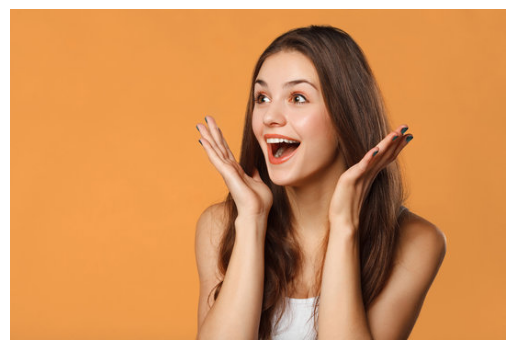

In [45]:
# View our example image
!wget -O happy_img.jpg https://t4.ftcdn.net/jpg/01/22/33/55/360_F_122335513_GB4jSOLOix2BTYODKet4qWJH7AEaEszL.jpg
steak = mpimg.imread("happy_img.jpg")
plt.imshow(steak)
plt.axis(False);

In [46]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [47]:
# Load in and preprocess our custom image
happy_img = load_and_prep_image("happy_img.jpg")

In [48]:
def make_predictions(model,image,class_names):
    image_convert_dim = tf.expand_dims(image, axis=0) # add an extra dimension at axis 0
    prediction = model.predict(image_convert_dim)
    print(prediction)
    pred_class = class_names[int(tf.round(prediction)[0][0])]
    print(f"The image belong to {pred_class} category")

In [49]:
make_predictions(model_tl_2,happy_img,class_names)

1/1 [==============================] - 0s 28ms/step
[[0.0000000e+00 1.0000000e+00 2.0106741e-32 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]
The image belong to anger category


In [51]:
class_names

array(['anger', 'disgust', 'fear', 'happy', 'pain', 'sad'], dtype='<U7')